In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score 
from sklearn.pipeline import Pipeline 

# GENERATE YOUR OWN MAGICAL DATASET

In [3]:
X = 6* np.random.rand(200,1)-3
y = 0.8 * X**2 + 0.9 *X + 2 + np.random.randn(200,1)


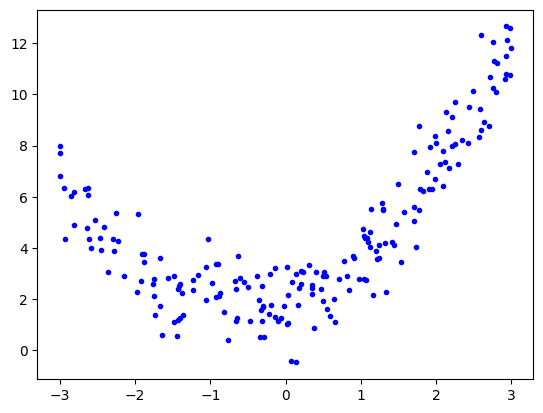

In [4]:
plt.plot(X, y, 'b.')
plt.show()

# First applying linear regression

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=2)

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.32397216878504387

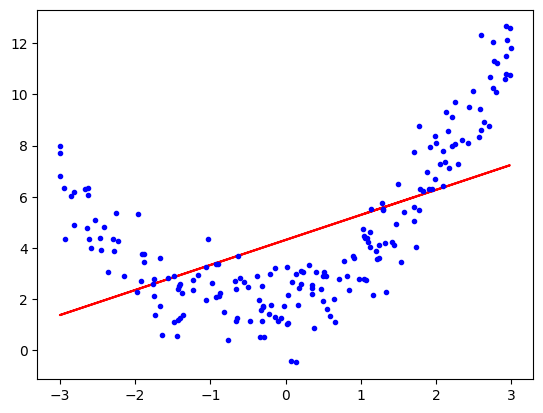

In [9]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b. ')
plt.show()

# Now applying 2D polynomial regression 

In [10]:
# Using degree 2

poly = PolynomialFeatures(degree = 2, include_bias = True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [11]:
print(X_train[0])
print(X_train_trans[0])

[1.06510945]
[1.         1.06510945 1.13445814]


In [12]:
# include bias parameter 

In [13]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test_trans)

In [15]:
r2_score(y_test,y_pred)

0.8934121192570245

In [16]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.94525136 0.81029864]]
[1.94419316]


In [17]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

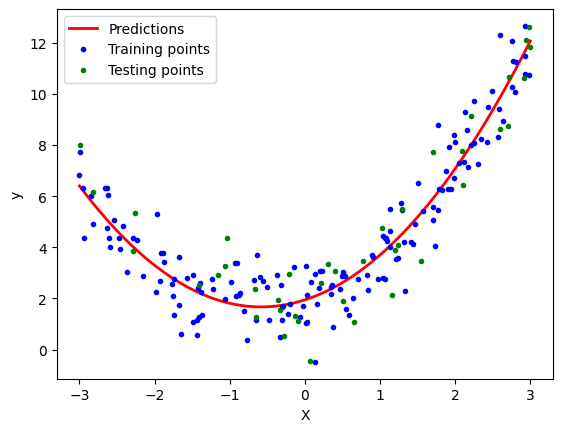

In [18]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [19]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

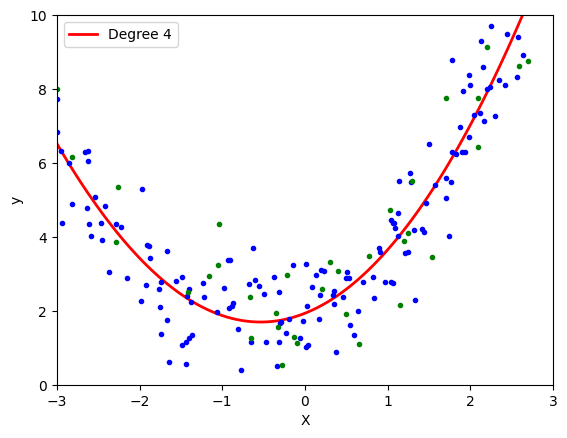

In [20]:
polynomial_regression(4)


In [21]:
poly.powers_

array([[0],
       [1],
       [2]])

# Let's apply 3D polynomial regression

In [22]:
x = 7* np.random.rand(100,1)-2.8
y = 7* np.random.rand(100,1)-2.8

z = x**2 +y**2 + 0.2*x + 0.2*y+ 0.1*x*y+ 2 + np.random.randn(100,1)

In [23]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [24]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)


In [25]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [26]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [27]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [28]:
# print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Ouput 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [29]:
X_multi_trans.shape


(100, 6)

In [30]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [31]:
X_test_multi = poly.transform(final)


In [32]:
z_final = lr.predict(X_multi_trans).reshape(10,10)


In [33]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()